In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('US_Accidents_June20.csv')

In [3]:
df.shape

(3513617, 49)

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace = True)

In [6]:
print('Rows x Columns: ',df.shape[0], df.shape[1])
print('Features      : ',df.columns.tolist())
print('Missing values: ',df.isnull().values.sum())
print('Unique values : \n',df.nunique())

Rows x Columns:  3513617 46
Features      :  ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset']
Missing values:  13061458
Unique values : 
 ID                   3513617
Source                     3
TMC                       21
Severity                   4
Start_Time           3200042
End_Time             3246120
Start_Lat            1124695
Start_Lng            1113407
End_Lat               375074
End_Lng               383569
Distance(m

In [7]:
print("Categorical columns:")

df.select_dtypes(exclude=['int','float']).columns

Categorical columns:


Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

### Correlation

In [8]:
print(df['Source'].unique())
print(df['Description'].unique())
print(df['Timezone'].unique())
print(df['Amenity'].unique())

['MapQuest' 'MapQuest-Bing' 'Bing']
['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Ramp closed to Bristol St - Road closed due to accident.'
 'At Friars Rd - Accident. Center lane blocked.'
 'Ramp closed to The City Dr/Exit 14A - Road closed due to accident.']
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
[False  True]


In [9]:
# convert boolean to int
for col in ('Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'):
    df[col + "_int"] = df[col].astype(int)

<AxesSubplot:>

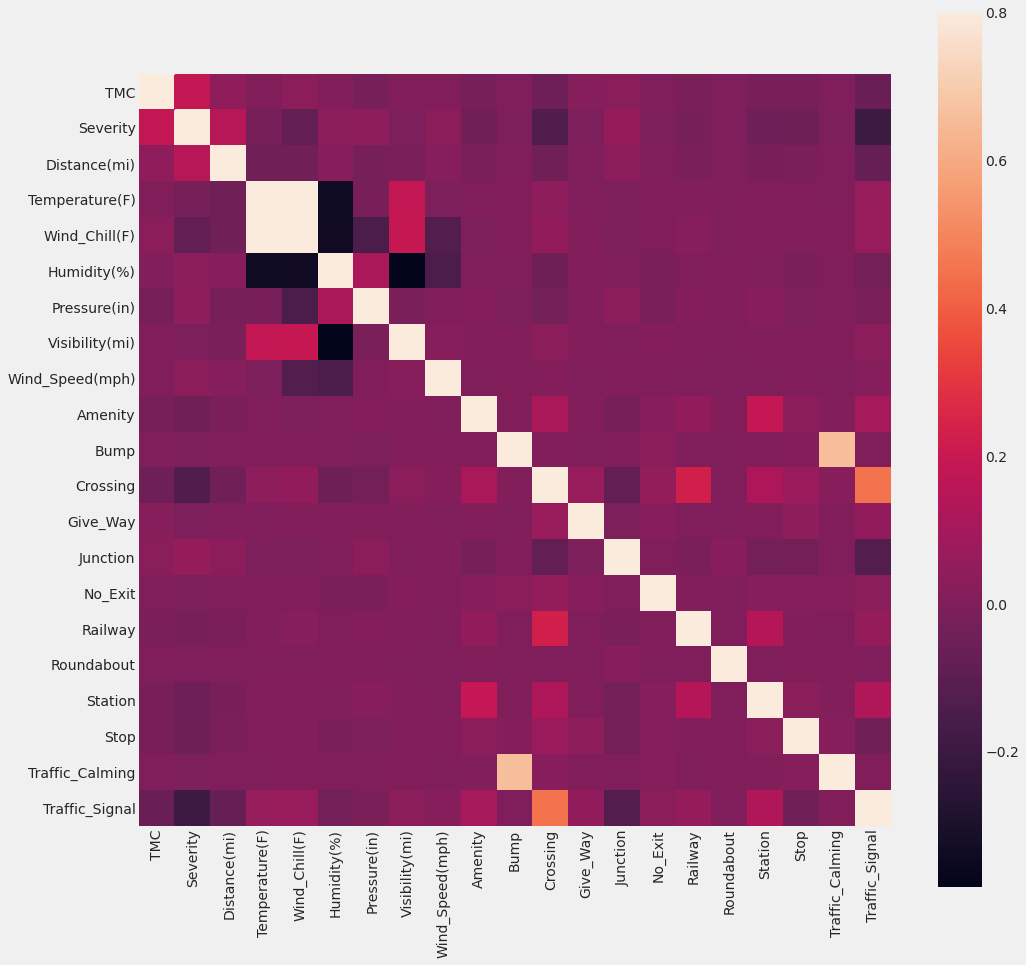

In [10]:
corrmat = df[['TMC','Severity','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']].corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=.8, square=True)

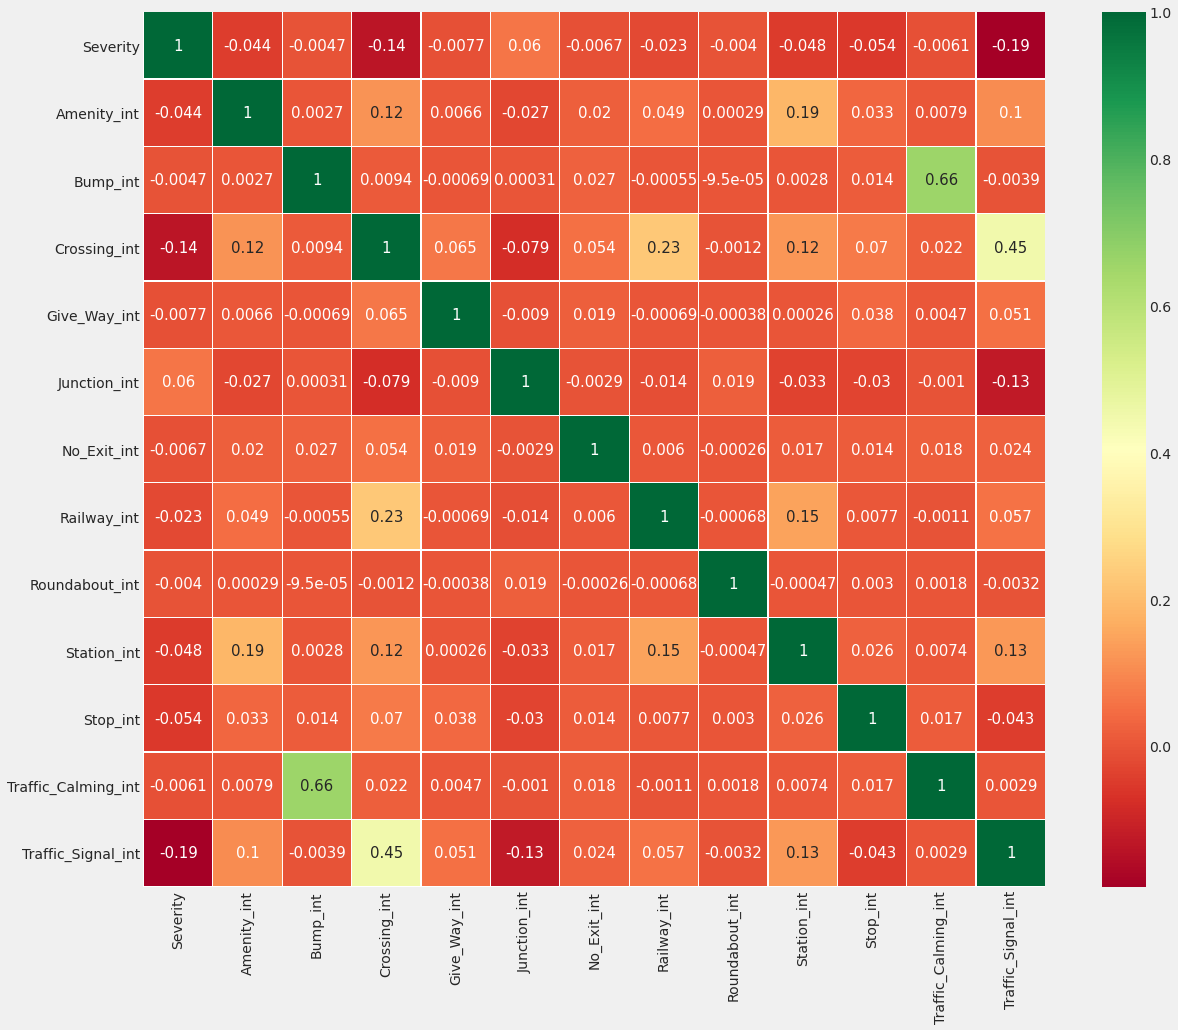

In [11]:
fig= sns.heatmap(df[['Severity','Amenity_int', 'Bump_int', 'Crossing_int', 'Give_Way_int', 'Junction_int', 'No_Exit_int', 'Railway_int', 'Roundabout_int', 'Station_int', 'Stop_int', 'Traffic_Calming_int', 'Traffic_Signal_int']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [12]:
# for i in range(1, 5):
#     df_sub = df[df.Severity==i]
#     fig= sns.heatmap(df_sub[['Amenity_int', 'Bump_int', 'Crossing_int', 'Give_Way_int', 'Junction_int', 'No_Exit_int', 'Railway_int', 'Roundabout_int', 'Station_int', 'Stop_int', 'Traffic_Calming_int', 'Traffic_Signal_int']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
#     fig=plt.gcf()
#     fig.set_size_inches(18,15)
#     plt.xticks(fontsize=14)
#     plt.yticks(fontsize=14)
#     plt.show()

### Source of Data

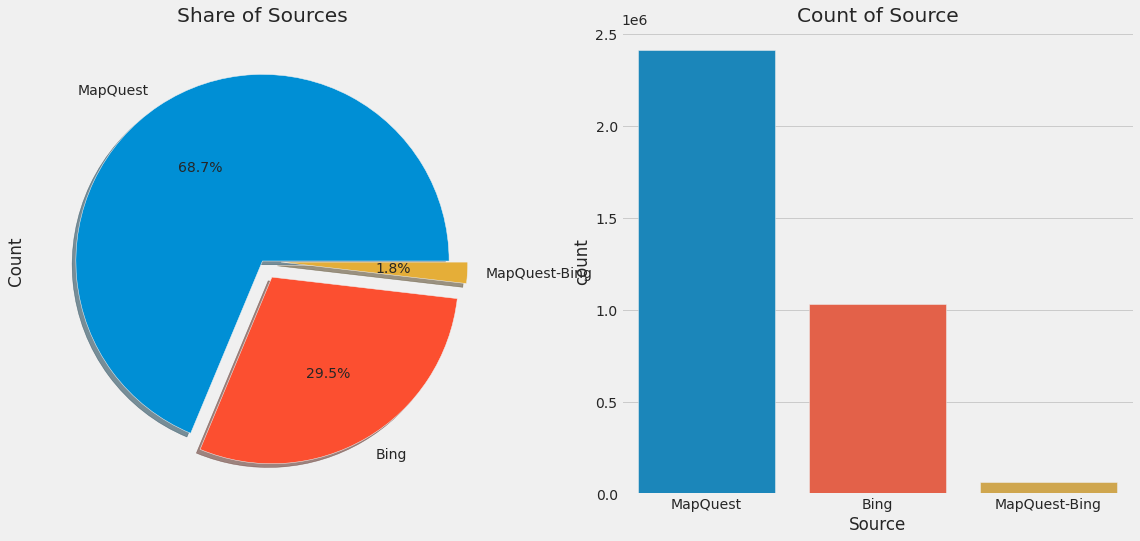

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

### Severity:

It shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

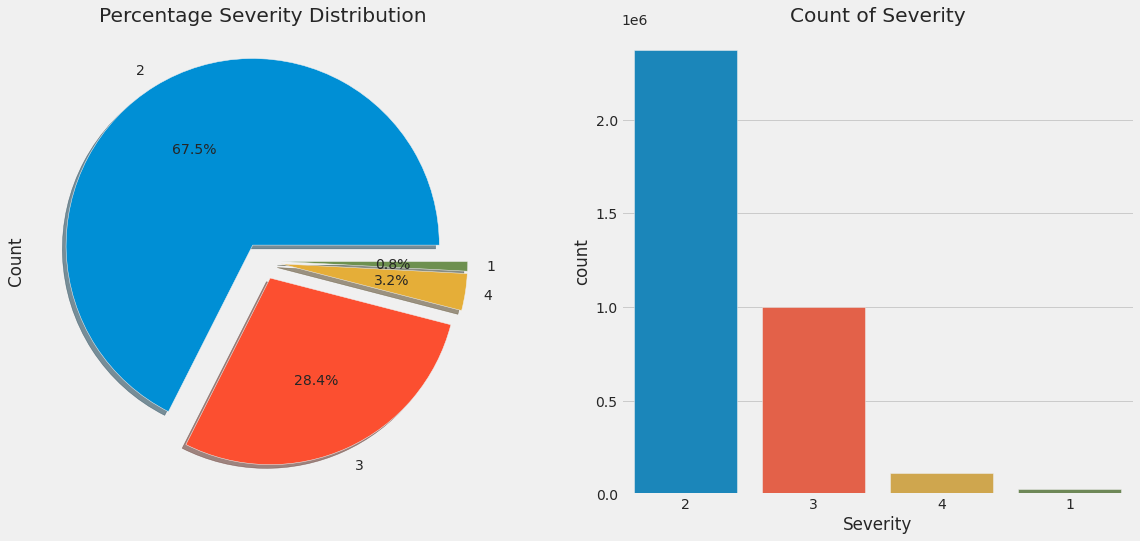

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)

ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')

sns.countplot('Severity', data=df, ax=ax[1], order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

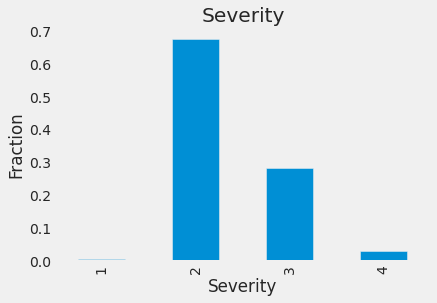

In [15]:
df.Severity.value_counts(normalize=True).sort_index().plot.bar()
plt.grid()
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Fraction');

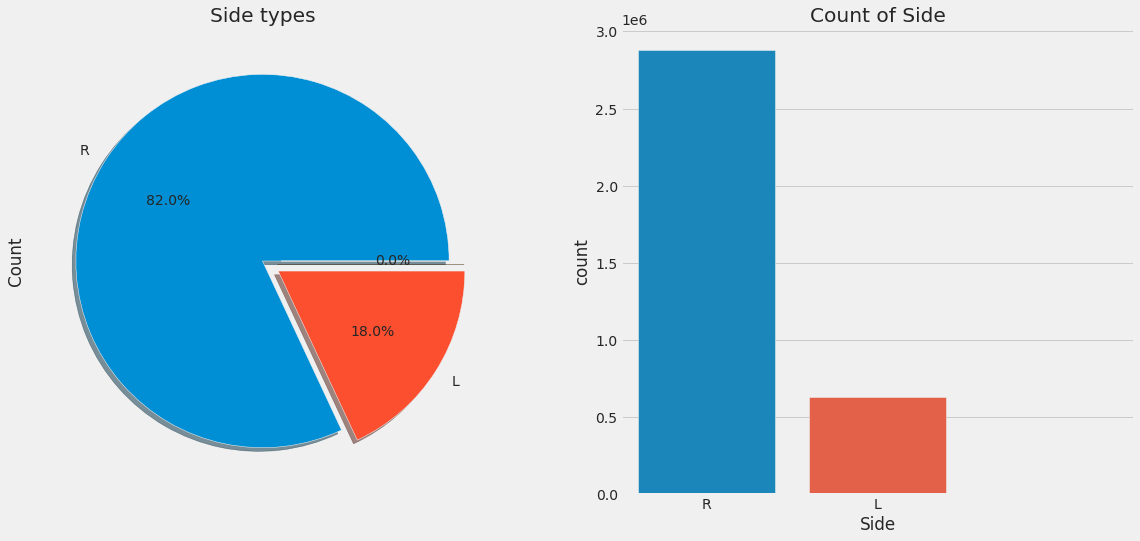

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

### Time taken to clear the traffic

In [17]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')

top 20 accident durations correspond to 81.8% of the data


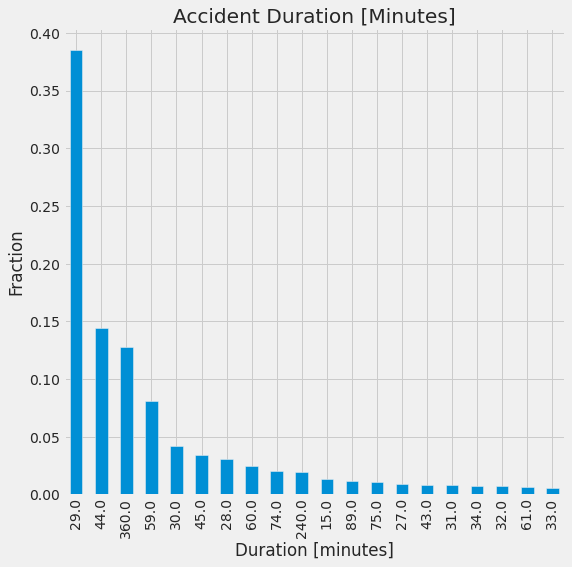

In [18]:
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(8,8))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration [minutes]')
plt.ylabel('Fraction');

#### top 20 accident durations correspond to 96.1% of the data

From the above curve we can see that most of the accidents take less than an hours time to get resolved.But more than 15% of the accidents are taking 360 minutes to resolve.

### Accidents per state

Text(0, 0.5, '')

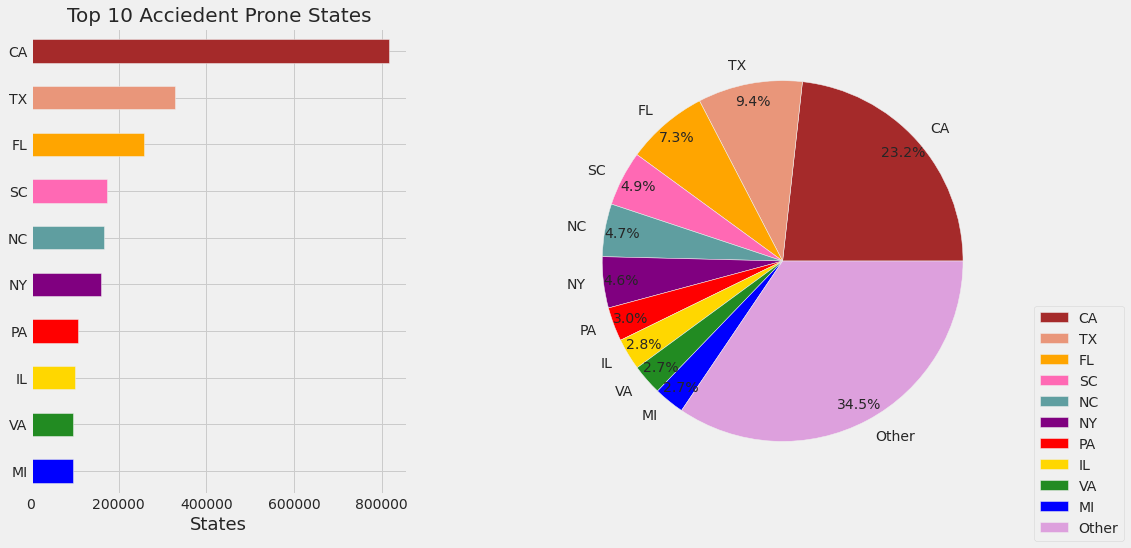

In [33]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

In [32]:
df_states = pd.read_csv('us_states_population.csv')
df_states.head()

,rank,State,Code,Pop,Growth,Pop2018,Pop2010,growthSince2010,Percent,density
0,24,Alabama,AL,4908620,0.0042,4887870,4785450,0.0257,0.0147,96.9221
1,49,Alaska,AK,734002,-0.0047,737438,713906,0.0281,0.0022,1.2863
2,14,Arizona,AZ,7378490,0.0288,7171650,6407770,0.1515,0.0221,64.9549
3,33,Arkansas,AR,3039000,0.0084,3013820,2921980,0.0400,0.0091,58.4030
4,1,California,CA,39937500,0.0096,39557000,37320900,0.0701,0.1194,256.3728


In [158]:
rows = []
for i, c in df['State'].value_counts().iteritems():
    pop = df_states.loc[df_states['Code'] == i]['Pop'].values[0]
    rows.append({'State' : i, 'Pop': pop, 'Accidents': c, 'Ratio': (c / pop)})

df_acc = pd.DataFrame(rows)    
df_acc = df_acc.sort_values(by='Ratio', ascending=False)
df_acc.head()

,State,Pop,Accidents,Ratio
3,SC,5210100,173277,0.033258
11,OR,4301090,90122,0.020953
0,CA,39937500,816825,0.020453
21,UT,3282120,51685,0.015747
4,NC,10611900,165958,0.015639


#### We can see that top accident prone states are South Carolina, Oregon and California

Text(0.5, 1.0, 'Accident/Population ratio by State')

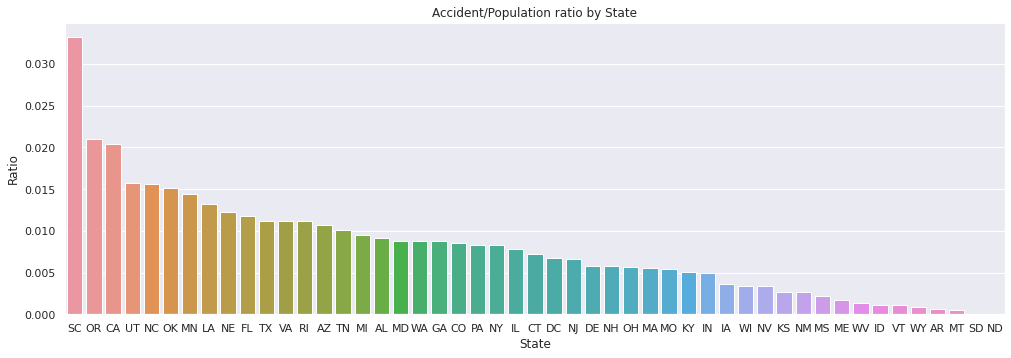

In [159]:
# df_acc.plot.bar(y='Ratio', x='State', title="Top Accident Prone States")
sns.set(rc={'figure.figsize':(15,5)})
g = sns.barplot(data=df_acc, x='State', y='Ratio')
g.set_title("Accident/Population ratio by State")

Text(0, 0.5, '')

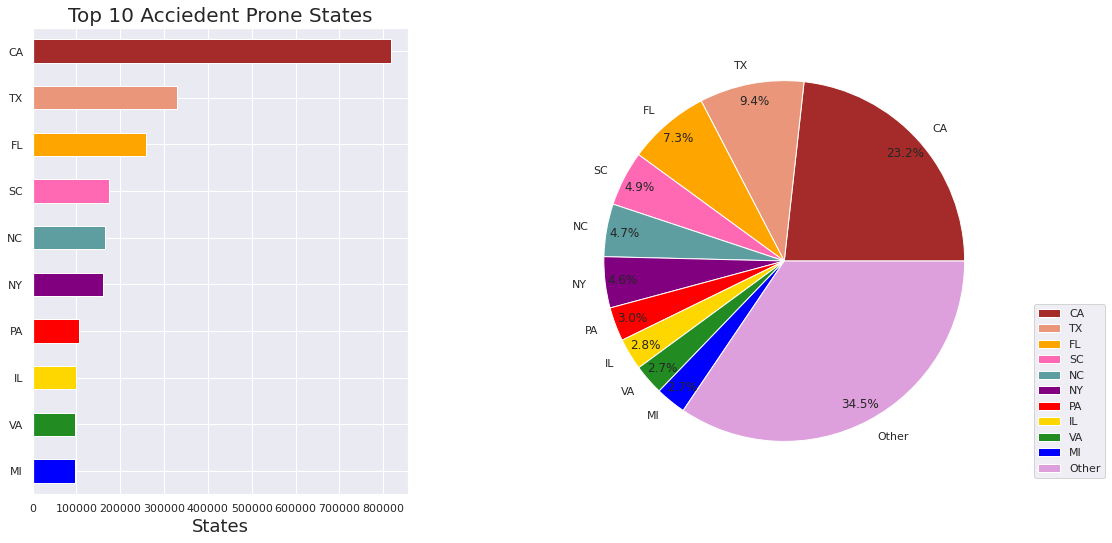

In [147]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

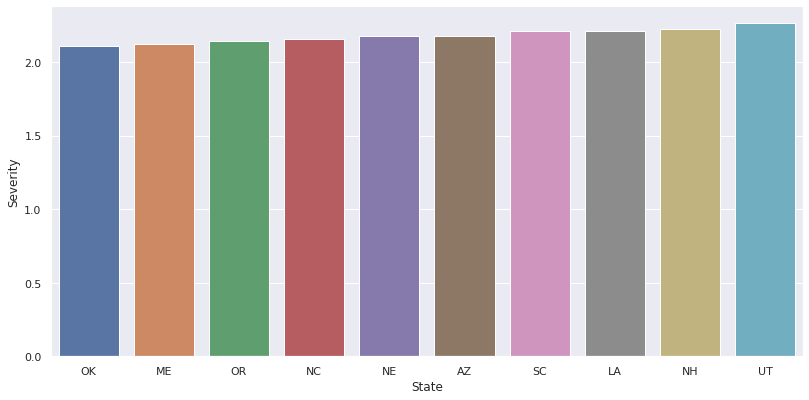

In [148]:
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()
plt.figure(figsize=(12,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State.head(10))
plt.ioff()

We can see Pennsylvania, South Carolina and Texas have the accidents with high severity

### Weather

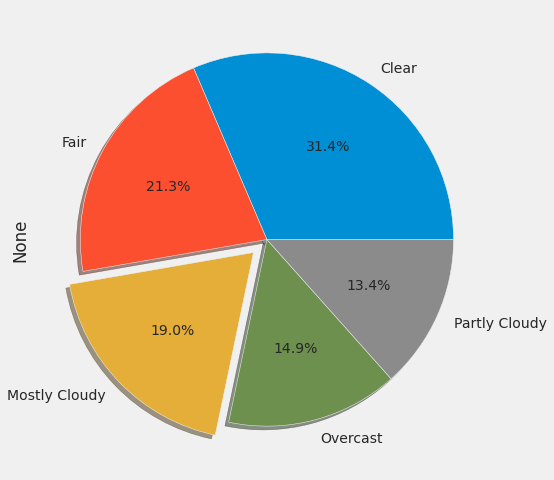

In [22]:
plt.figure(figsize=(14,8))
df.groupby('Weather_Condition') \
        .size() \
        .sort_values(ascending = False) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.ioff()


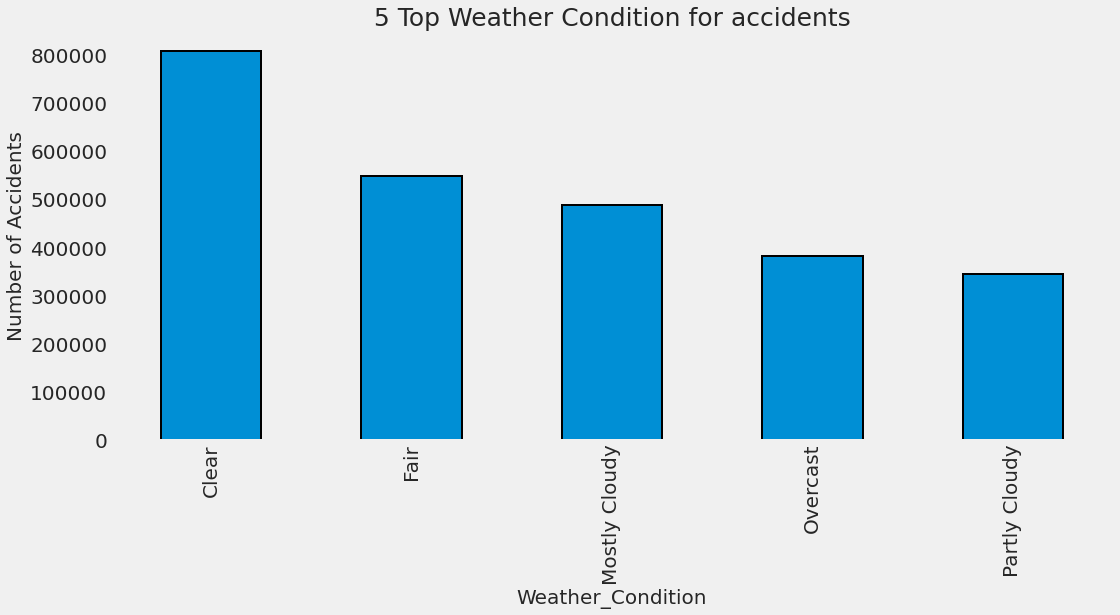

In [23]:
fig, ax=plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

Suprisingly most accidents occure when the weather is clear..May be people drive more carefully when the weather os bad.

#### Where accidents occuring

In [24]:
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
booldf = df[bool_cols]
not_one_hot = booldf[booldf.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 284711 non one hot metadata rows, which are 8.1% of the data


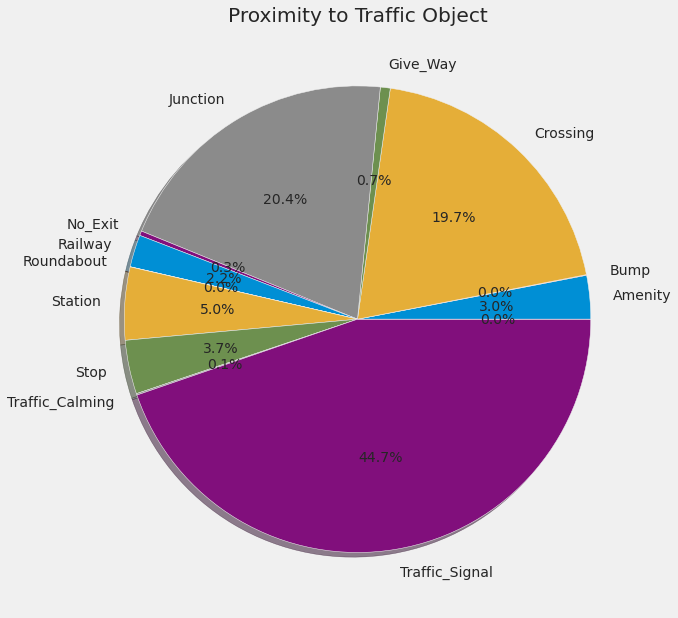

In [25]:
bools = booldf.sum(axis=0)

bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

We can see that more accidents are happening near traffic signal,junction and crossings

### Accident Counts

In [26]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Give_Way_int,Junction_int,No_Exit_int,Railway_int,Roundabout_int,Station_int,Stop_int,Traffic_Calming_int,Traffic_Signal_int,Turning_Loop_int
time,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


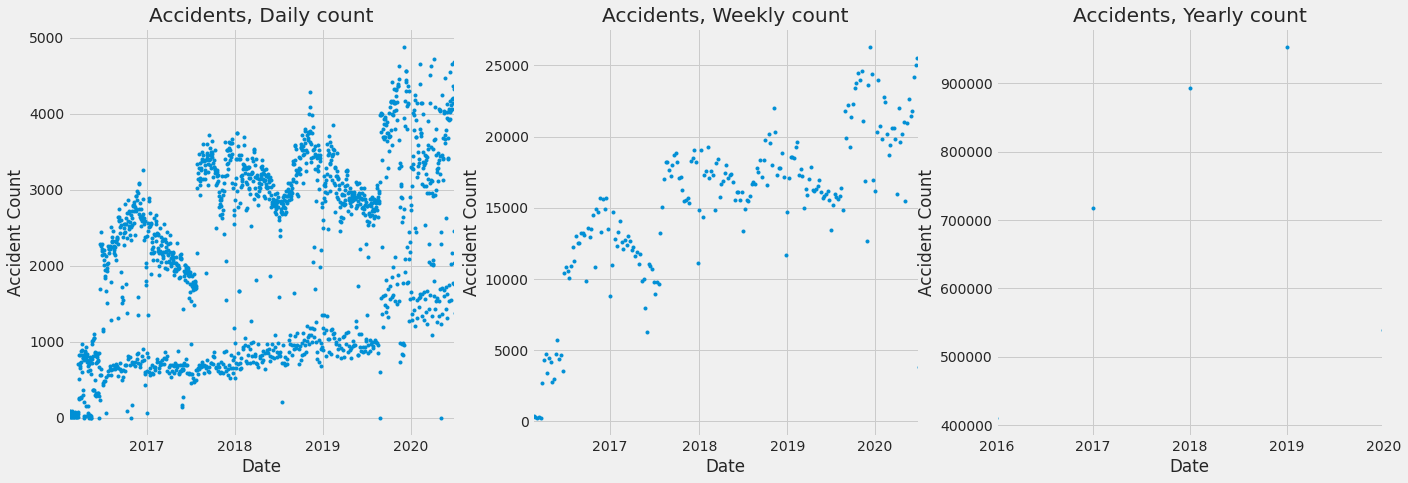

In [27]:
freq_text = {'D':'Daily','W':'Weekly','Y':'Yearly'}
plt.subplots(1,3,figsize=(21,7))
for i, (fr,text) in enumerate(freq_text.items(),1):
    plt.subplot(1,3,i)
    sample = df.ID['2016':].resample(fr).count()
    sample.plot(style='.')
    plt.title('Accidents, {} count'.format(text))
    plt.xlabel('Date')
    plt.ylabel('Accident Count');

Accident count habe been increasing and it also has a seasonality trend

In [28]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

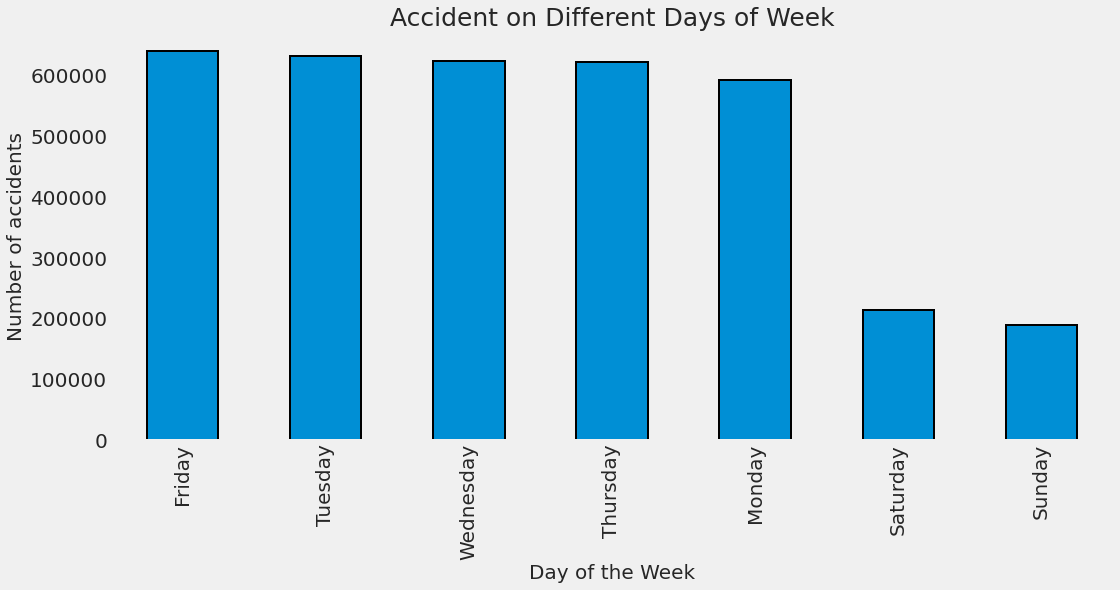

In [29]:
fig, ax=plt.subplots(figsize=(16,7))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=20)
plt.ylabel('Number of accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Accident on Different Days of Week',fontsize=25)
plt.grid()
plt.ioff()

### Scatter Plot

<Figure size 1008x576 with 0 Axes>

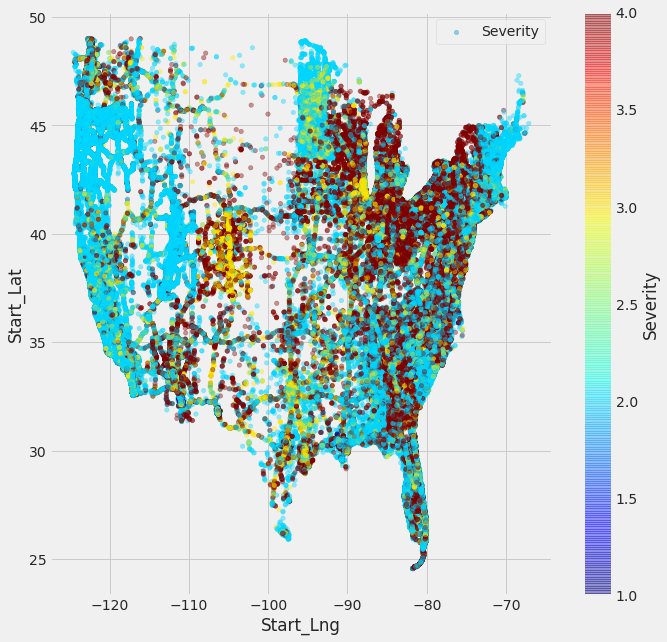

In [30]:
plt.figure(figsize=(14,8))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,10))
viz_4.legend()
plt.ioff()

Even though more accidents happen in the state of California we can see that more severe Accidents happen to the North Eastern States of USA